In [20]:
import PyMca5 as mca
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Initialise some variables
specdir = '/users/zatterin/Documents/data/IHR_20161114/spec/'
sample_name = 'e16095'
rois = ['mpx4int', 'mpx4ro1', 'mpx4ro2']

In [21]:
# See kmap specspecfiles corresponding to specified sample name
specfiles = !ls {specdir} | grep spec | grep fast | grep -i {sample_name}
for index, fname in enumerate(specfiles): print(str(index)+'...'+str(fname))

0...20161115_E16095_fast_00011.spec
1...20161117_E16095_fast_00003.spec
2...20161117_E16095_fast_00005.spec


In [41]:
# specify filenum to inspect
i = 1

In [42]:
sf = mca.specfile.Specfile(specdir+specfiles[i])
n_scans = int(sf.list()[2:])
print('{0} --> {1} scans'.format(specfiles[i],n_scans))

20161117_E16095_fast_00003.spec --> 15 scans


In [43]:
# specify scan number to inspect
scan_no = 0

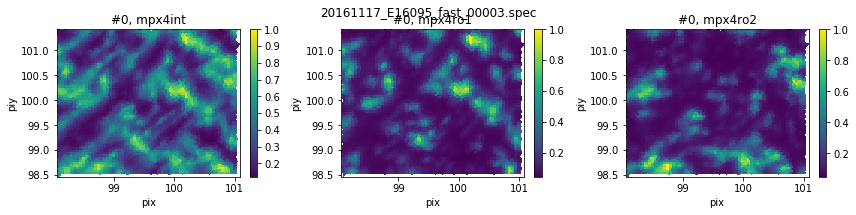

In [81]:
# get the scan (pymca scandata obj)
scan = mca.specfile.Specfile(specdir+specfiles[i])[scan_no]
# get the data (np array)
data = scan.data()
# get the spec indexes (list)
index_list = scan.alllabels()

# plotting
fig = plt.figure(figsize=(12,3))
# how many fig to plot?
tot_fig = len(rois)

for index, roi in enumerate(rois):
    plt.subplot(1, tot_fig, index+1)
    # load data
    rawdata =  data[index_list.index(roi)]
    # normalise
    rawdata = rawdata / rawdata.max()
    motor_1 = data[index_list.index('adcX')]
    motor_2 = data[index_list.index('adcY')]
    new_shape = (int(scan.command().split()[8]), int(scan.command().split()[4]))
    # apply dimensions
    rawdata.shape, motor_1.shape, motor_2.shape = new_shape, new_shape, new_shape
    # plot it
    plt.pcolormesh(motor_1, motor_2, rawdata)
    plt.axis([motor_1.min(),motor_1.max(),motor_2.min(),motor_2.max()])
    plt.ylabel('piy')
    plt.xlabel('pix')
    plt.colorbar(fraction=0.04)
    plt.title('#{0}, {1}'.format(scan_no, roi))
    plt.suptitle(specfiles[i])

plt.tight_layout()


In [59]:
from mpl_toolkits.axes_grid1 import ImageGrid

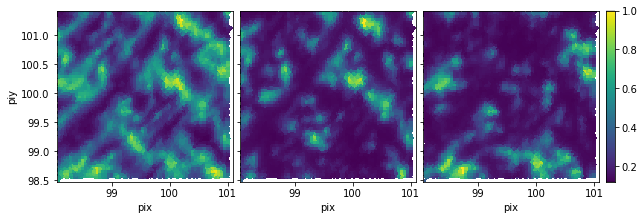

In [85]:
fig2 = plt.figure(2,figsize=(10.,30.))
grid = ImageGrid(fig2, 111,
                nrows_ncols=(1,3),
                axes_pad = 0.1,
                cbar_mode = 'single',
                cbar_location = 'right') 

for index, roi in enumerate(rois):
    # load data
    rawdata =  data[index_list.index(roi)]
    # normalise
    rawdata = rawdata / rawdata.max()
    # load motor positions
    motor_1 = data[index_list.index('adcX')]
    motor_2 = data[index_list.index('adcY')]
    new_shape = (int(scan.command().split()[8]), int(scan.command().split()[4]))
    # apply dimensions
    rawdata.shape, motor_1.shape, motor_2.shape = new_shape, new_shape, new_shape
    # plot it
    im = grid[index].pcolormesh(motor_1, motor_2, rawdata)
    grid[index].set_ylabel('piy')
    grid[index].set_xlabel('pix')
    grid.cbar_axes[index].colorbar(im)